In [ ]:
#Use the newsapi to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.
# Use descriptive statistics to answer the following questions:
# Which coin had the highest mean positive score?
# Which coin had the highest negative score?
# Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mknitchov\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
C:\Users\mknitchov\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
 

In [3]:
# Read your api key environment variable
load_dotenv("example.env")
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="Bitcoin", language="en", page_size=100, sort_by="relevancy")
print(f"Total Articles About Bitcoin: {bitcoin_news['totalResults']}")
bitcoin_news["articles"][0]

Total Articles About Bitcoin: 10267


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Alex Wilhelm',
 'title': 'What Square’s smashing earnings tell us about consumer bitcoin demand',
 'description': "Today we're talking Square earnings and its bitcoin base, especially in how it relates to the results of other entities that offer bitcoin sales.",
 'url': 'http://techcrunch.com/2021/05/07/what-squares-smashing-earnings-tell-us-about-consumer-bitcoin-demand/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/05/NSussman_Techcrunch_Exchange_v3-ORNG.jpg?w=533',
 'publishedAt': '2021-05-07T18:17:36Z',
 'content': 'Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]'}

In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")
print(f"Total Articles About Ethereum: {ethereum_news['totalResults']}")
ethereum_news["articles"][0]

Total Articles About Ethereum: 3980


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'David Riggs',
 'title': 'Radical Ethereum entrepreneurs are redefining what ‘rape kit’ means',
 'description': 'Their investors call them disruptive innovators and detractors. Some call them “dirty scammers.” But the Leda Health co-founders think of themselves as advocates for sexual assault survivors.',
 'url': 'http://techcrunch.com/2021/05/04/radical-ethereum-entrepreneurs-are-redefining-what-rape-kit-means/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/05/created-for-survivors.jpg?w=710',
 'publishedAt': '2021-05-04T14:30:39Z',
 'content': 'Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]'}

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "neutral": neu,
            "negative": neg
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()



,date,text,compound,positive,negative,neutral
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.0,0.942
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.0,1.000
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829
3,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.0,1.000
4,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "neutral": neu,
            "negative": neg
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "positive", "negative", "neutral", "date", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()



,compound,positive,negative,neutral,date,text
0,-0.4019,0.072,0.15,0.778,2021-05-04,Their investors call them disruptive innovator...
1,0.7506,0.171,0.00,0.829,2021-04-20,Cryptocurrency continues to gain mainstream ac...
2,0.0258,0.034,0.00,0.966,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...
3,0.0000,0.000,0.00,1.000,2021-05-01,New York (CNN Business)Bitcoin prices continue...
4,0.4754,0.091,0.00,0.909,2021-05-03,"The creators behind CryptoPunks, one of the mo..."


In [87]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [21]:
#Unable to print the sentiments

In [21]:
# Tokenizer
# In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
# Lowercase each word.Remove Punctuation.Remove Stopwords.

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [22]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

In [30]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    
    # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in stop_words]
    
    
    return output

In [33]:
processed = tokenizer(text)
print(processed)

['sothebys', 'said', 'tuesday', 'would', 'accept', 'bitcoin', 'ethereum', 'payment', 'banksys', 'iconic', 'artwork', 'love', 'air', 'first', 'physical', 'art', 'auction', 'latest', 'sign', 'growing', 'mainstrea', 'char']


In [26]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.0,0.942,"[shares, square, today, american, fintech, com..."
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.0,1.000,"[teslas, relationship, bitcoin, dalliance, acc..."
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.0,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
3,2021-04-23,Cryptocurrency prices continued to tumble Frid...,0.0000,0.000,0.0,1.000,"[cryptocurrency, price, continued, tumble, fri..."
4,2021-04-13,The crypto industry as a whole has seen a mome...,0.6124,0.135,0.0,0.865,"[crypto, industry, whole, ha, seen, momentous,..."


In [27]:
 # Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,compound,positive,negative,neutral,date,text,tokens
0,-0.4019,0.072,0.15,0.778,2021-05-04,Their investors call them disruptive innovator...,"[investor, call, disruptive, innovator, detrac..."
1,0.7506,0.171,0.00,0.829,2021-04-20,Cryptocurrency continues to gain mainstream ac...,"[cryptocurrency, continues, gain, mainstream, ..."
2,0.0258,0.034,0.00,0.966,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,"[venmo, jumping, aboard, cryptocurrency, bandw..."
3,0.0000,0.000,0.00,1.000,2021-05-01,New York (CNN Business)Bitcoin prices continue...,"[new, york, cnn, businessbitcoin, price, conti..."
4,0.4754,0.091,0.00,0.909,2021-05-03,"The creators behind CryptoPunks, one of the mo...","[creator, behind, cryptopunks, one, popular, n..."


In [ ]:
# In this section you will look at the ngrams and word frequency for each coin. 
# Use NLTK to produce the n-grams for N = 2. 
# List the top 10 words for each coin.

In [28]:
from collections import Counter
from nltk import ngrams

In [49]:
# Define tokens
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens

bitcoin_tokens = get_tokens(bitcoin_df)
ethereum_tokens = get_tokens(ethereum_df)

In [53]:
# Generate the Bitcoin N-grams where N=2
bigram_btc_counts = Counter(ngrams(bitcoin_tokens, n=2))
bigram_btc_counts.most_common(20)

[(('char', 'reuters'), 18),
 (('virtual', 'currency'), 16),
 (('illustration', 'taken'), 14),
 (('representation', 'virtual'), 12),
 (('currency', 'bitcoin'), 12),
 (('seen', 'front'), 11),
 (('front', 'stock'), 11),
 (('stock', 'graph'), 11),
 (('graph', 'illustration'), 11),
 (('char', 'bitcoin'), 10),
 (('bitcoin', 'seen'), 9),
 (('char', 'representation'), 8),
 (('record', 'high'), 8),
 (('taken', 'march'), 7),
 (('march', 'reutersdado'), 7),
 (('reuters', 'staffapril'), 5),
 (('staffapril', 'reuters'), 5),
 (('reuters', 'stafffile'), 5),
 (('stafffile', 'photo'), 5),
 (('hit', 'record'), 5)]

In [52]:
# Generate the Ethereum N-grams where N=2
bigram_eth_counts = Counter(ngrams(ethereum_tokens, n=2))
bigram_eth_counts.most_common(20)

[(('char', 'reuters'), 4),
 (('representation', 'virtual'), 4),
 (('virtual', 'currency'), 4),
 (('currency', 'ethereum'), 4),
 (('ethereum', 'seen'), 4),
 (('seen', 'front'), 4),
 (('front', 'stock'), 4),
 (('stock', 'graph'), 4),
 (('graph', 'illustration'), 4),
 (('illustration', 'taken'), 4),
 (('taken', 'february'), 4),
 (('february', 'reutersdado'), 4),
 (('bitcoin', 'ethereum'), 3),
 (('ether', 'hit'), 3),
 (('hit', 'record'), 3),
 (('record', 'high'), 3),
 (('th', 'char'), 2),
 (('reuters', 'stafffile'), 2),
 (('stafffile', 'photo'), 2),
 (('photo', 'representation'), 2)]

In [59]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return Counter(tokens).most_common(N)

In [60]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_tokens)

[('char', 100),
 ('bitcoin', 75),
 ('reuters', 34),
 ('cryptocurrency', 27),
 ('currency', 23),
 ('seen', 20),
 ('ha', 19),
 ('stock', 19),
 ('virtual', 16),
 ('inc', 15)]

In [61]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_tokens)

[('char', 20),
 ('ethereum', 9),
 ('cryptocurrency', 6),
 ('reuters', 6),
 ('currency', 6),
 ('stock', 6),
 ('bitcoin', 5),
 ('ha', 4),
 ('project', 4),
 ('crypto', 4)]

In [ ]:
# In this section, you will generate word clouds for each coin to summarize the news for each coin

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

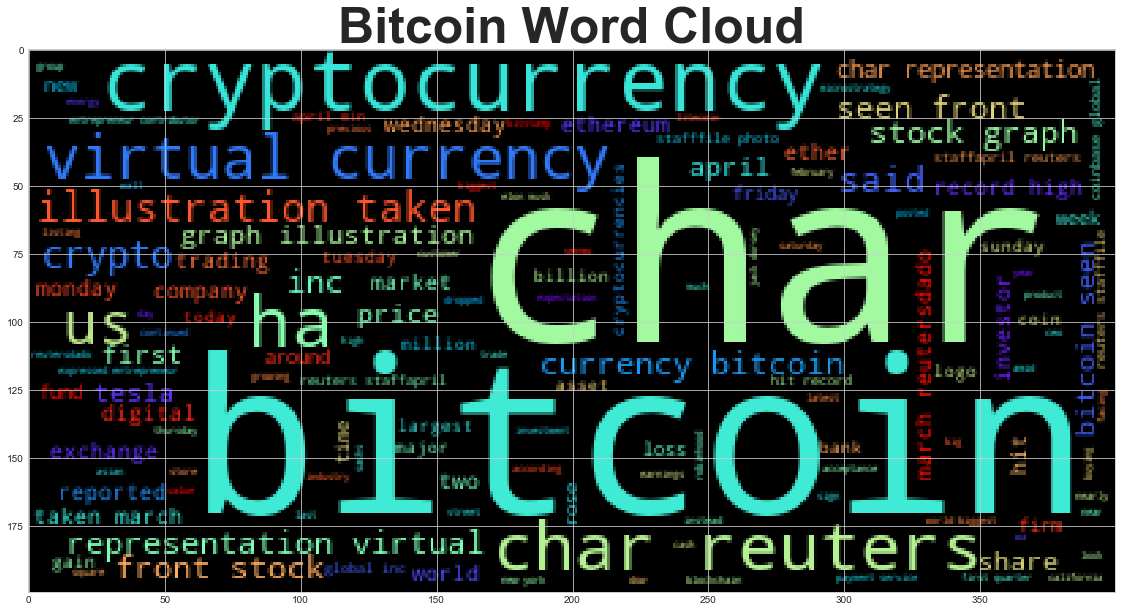

In [63]:
# Generate the Bitcoin word cloud
big_string = ' '.join(bitcoin_tokens)
wc = WordCloud(colormap="rainbow").generate(big_string)
plt.title("Bitcoin Word Cloud", {"fontsize":50, "fontweight": "bold"})
plt.imshow(wc)

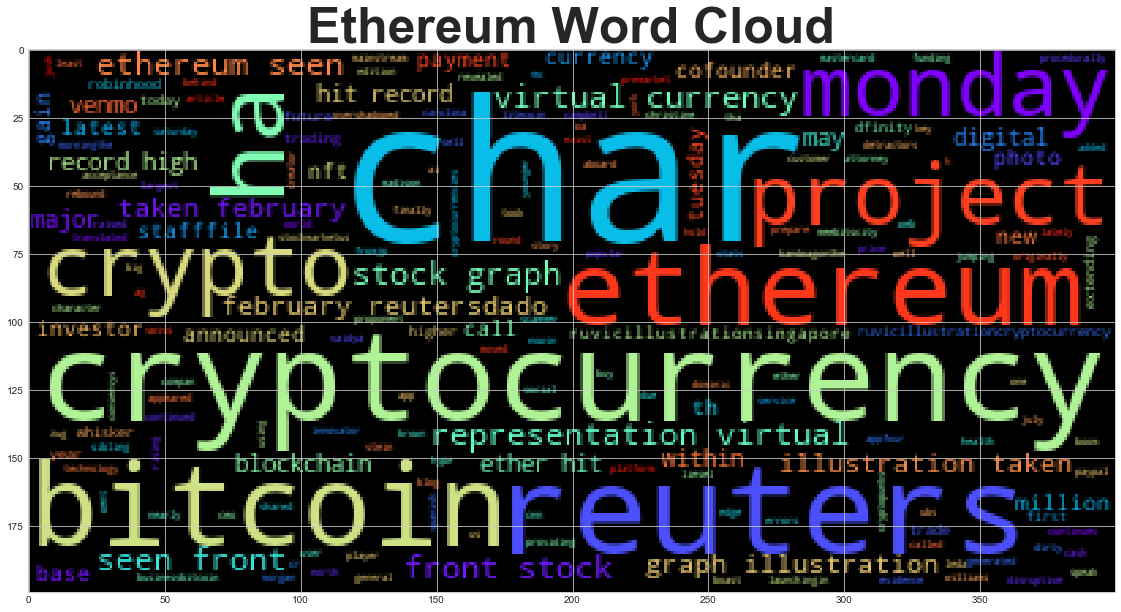

In [65]:
# Generate the Ethereum word cloud
big_string = ' '.join(ethereum_tokens)
wc = WordCloud(colormap="rainbow").generate(big_string)
plt.title("Ethereum Word Cloud", {"fontsize":50, "fontweight": "bold"})
plt.imshow(wc)

In [ ]:
# In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [66]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy

In [68]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm') 

In [77]:
# Concatenate all of the Bitcoin text together
bitcoin_concat = ' '.join(bitcoin_df['text'])

In [78]:
# Run the NER processor on all of the text
doc_btc = nlp(bitcoin_concat)

In [79]:
# Add a title to the document
doc_btc.user_data["Title"] = "Bitcoin NER"

In [80]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [81]:
# List all Entities
for ent in doc_btc.ents:
    print(ent.text, ent.label_)

more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
a momentous year DATE
2020 DATE
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
] Earth Day EVENT
Jack Dorsey PERSON
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Dogecoin GPE
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Jack Dorsey PERSON
Twitter PRODUCT
Wednesday DATE
Elon Musk PERSON
BBC ORG
Coinswitch Kuber PERSON
India GPE
Thursday DATE
$25 million MONEY
Indi GPE
R

In [82]:
# Concatenate all of the Ethereum text together
ethereum_concat = ' '.join(ethereum_df['text'])

In [83]:
# Run the NER processor on all of the text
doc_eth = nlp(ethereum_concat)

In [84]:
# Add a title to the document
doc_eth.user_data["Title"] = "Ethereum NER"

In [85]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [86]:
# List all Entities
for ent in doc_eth.ents:
    print(ent.text, ent.label_)

North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
ConsenSys ORG
Ethereum ORG
$65 million MONEY
J.P. Morgan PERSON
Mastercard PERSON
UBS AG ORG
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Topps GPE
first ORDINAL
NFT ORG
Dow Jones Indices ORG
February 19, 2021 DATE
Dado Ruvic/Ill